# Benchmark MI matrix

Time calculation of the mutual information matrix for datasets with different numbers of genes, and plot the results.

## More details
The MI matrix is the symmetrical matrix of the mutual information between each pair of genes in the dataset.

Data are generated randomly for this test, for 700 cells, which we consider to be a medium-sized dataset. Since these tests are for comparison with existing software, for which Bayesian blocks discretization may not be available, the data are discretized using uniform width, with 26 bins (≈ √700). Bayesian blocks discretization tends to result in fewer bins, which would make calculating the MI matrix faster.

For timings of network inference using PIDC, see __Benchmark network inference__. For timings related to discretization, see __Benchmark discretization__.

In [1]:
# Include packages

using NetworkInference
using InformationMeasures
using PyPlot

include("../helper_functions.jl")

get_times_per_number_of_cells (generic function with 1 method)

In [3]:
# Customize options (defaults are consistent with Fig. 7A)

algorithm = MINetworkInference()
discretizer = "uniform_width"
number_of_cells = 700
min_number_of_genes = 100
max_number_of_genes = 1000
step = 100;

In [4]:
# Time network inference

sizes, times = get_times_per_number_of_genes(algorithm, discretizer, number_of_cells, min_number_of_genes, max_number_of_genes, step)

Generating data...
Storing data as Genes..
Timing network inference...
-------------
10 genes:
1.730812369 s
-------------
20 genes:
0.010548123 s
-------------
30 genes:
0.014432699 s
-------------
40 genes:
0.097406263 s
-------------
50 genes:
0.061412327 s
-------------
60 genes:
0.060371153 s
-------------
70 genes:
0.07929683 s
-------------
80 genes:
0.093514965 s
-------------
90 genes:
0.124359235 s
-------------
100 genes:
0.15025134 s


(Any[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], Any[1.73081, 0.0105481, 0.0144327, 0.0974063, 0.0614123, 0.0603712, 0.0792968, 0.093515, 0.124359, 0.150251])

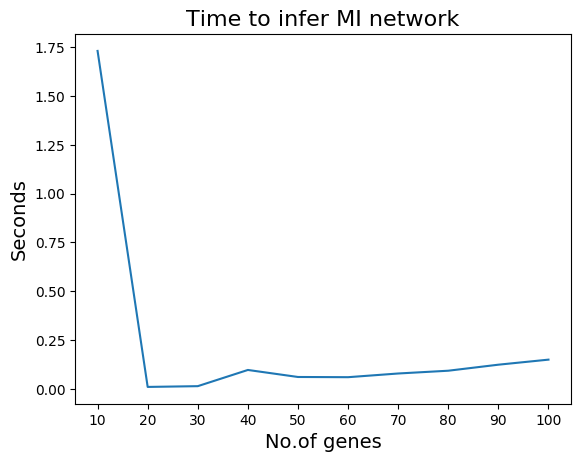

PyObject <matplotlib.text.Text object at 0x12dd11bd0>

In [5]:
# Plot times
plot(sizes, times)
plt[:xlabel]("No.of genes", fontsize = 14)
plt[:ylabel]("Seconds", fontsize = 14)
plt[:xticks](collect(min_number_of_genes:step:max_number_of_genes))
plt[:title]("Time to infer MI network", fontsize = 16)